In [ ]:
"""
https://www.kaggle.com/anokas/kuzushiji

Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in
the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one
character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.

kmnist-[train/test]-[images/labels].npz: These files contain the Kuzushiji-MNIST as compressed numpy arrays,
and can be read with: arr = np.load(filename)['arr_0']. We recommend using these files to load the dataset.
"""

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ianda\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
filepath = 'C:/Users/ianda/Desktop/Dropbox (NSF CORE)/Coding Projects/Python/Udemy_MachineLearning/Kuzushiji/'

In [21]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.load.html
# https://stackoverflow.com/questions/44289302/how-do-i-view-data-object-contents-within-an-npz-file
# https://stackoverflow.com/questions/32682928/loading-arrays-from-npz-files-in-pythhon
# https://stackoverflow.com/questions/48429408/open-and-view-npz-file-in-python

train_imgs = np.load(filepath+'k49-train-imgs.npz')['arr_0']
test_imgs = np.load(filepath+'k49-test-imgs.npz')['arr_0']
train_labels = np.load(filepath+'k49-train-labels.npz')['arr_0']
test_labels = np.load(filepath+'k49-test-labels.npz')['arr_0']

In [22]:
len(train_imgs)

232365

In [23]:
type(train_imgs)

numpy.ndarray

In [24]:
train_imgs_len = len(train_imgs)
test_imgs_len = len(test_imgs)

In [28]:
train_imgs_x = train_imgs.reshape(train_imgs_len, 784) # 60000 items, flattened from 28x28 to linear 784
test_imgs_x = test_imgs.reshape(test_imgs_len, 784)

# normalize data (starts as 0-255 integer)
# step 1 converts them to float
train_imgs_x = train_imgs_x.astype('float32')
test_imgs_x = test_imgs_x.astype('float32')

#step 2 converts them to range 0-1
train_imgs_x /= 255
test_imgs_x /= 255

In [27]:
num_classes=len(np.unique(train_labels))
print(num_classes)

49


In [29]:
train_labels_y = tensorflow.keras.utils.to_categorical(train_labels, num_classes)
test_labels_y = tensorflow.keras.utils.to_categorical(test_labels, num_classes) # converts to one hot

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


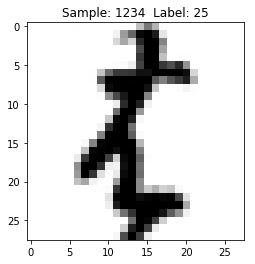

In [31]:
def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels_y[num])  
    #Print the label converted back to a number
    label = train_labels_y[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_imgs_x[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [41]:
print("train_images: {}".format(train_imgs.shape))
print("train_label: {}".format(train_labels.shape))
print("test_data: {}".format(test_imgs.shape))
print("test_label: {}".format(test_labels.shape))

train_images: (232365, 28, 28)
train_label: (232365,)
test_data: (38547, 28, 28)
test_label: (38547,)


In [ ]:
# Flat model

In [49]:
model = Sequential() # means you can add layers one at a time
model.add(Dense(512, activation='relu', input_shape=(784,))) # dense first hidden layer of 512 neurons
model.add(Dense(num_classes, activation='softmax'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 49)                25137     
Total params: 427,057
Trainable params: 427,057
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [52]:
history = model.fit(train_imgs_x, train_labels_y,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_imgs_x, test_labels_y))

Train on 232365 samples, validate on 38547 samples
Epoch 1/10
 - 33s - loss: 0.7657 - acc: 0.8033 - val_loss: 0.8234 - val_acc: 0.7946
Epoch 2/10
 - 29s - loss: 0.4071 - acc: 0.8937 - val_loss: 0.7334 - val_acc: 0.8259
Epoch 3/10
 - 27s - loss: 0.3267 - acc: 0.9144 - val_loss: 0.7127 - val_acc: 0.8379
Epoch 4/10
 - 27s - loss: 0.2799 - acc: 0.9270 - val_loss: 0.7297 - val_acc: 0.8418
Epoch 5/10
 - 28s - loss: 0.2491 - acc: 0.9354 - val_loss: 0.7538 - val_acc: 0.8419
Epoch 6/10
 - 29s - loss: 0.2222 - acc: 0.9429 - val_loss: 0.7967 - val_acc: 0.8439
Epoch 7/10
 - 26s - loss: 0.2018 - acc: 0.9480 - val_loss: 0.8334 - val_acc: 0.8414
Epoch 8/10
 - 24s - loss: 0.1840 - acc: 0.9524 - val_loss: 0.8706 - val_acc: 0.8440
Epoch 9/10
 - 24s - loss: 0.1690 - acc: 0.9565 - val_loss: 0.8924 - val_acc: 0.8442
Epoch 10/10
 - 27s - loss: 0.1556 - acc: 0.9598 - val_loss: 0.9522 - val_acc: 0.8437


In [ ]:
#2D model

In [53]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_imgs_2Dx = train_imgs.reshape(train_imgs.shape[0], 1, 28, 28)
    test_imgs_2Dx = test_imgs.reshape(test_imgs.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_imgs_2Dx = train_imgs.reshape(train_imgs.shape[0], 28, 28, 1)
    test_imgs_2Dx = test_imgs.reshape(test_imgs.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_imgs_2Dx = train_imgs_2Dx.astype('float32') # data originally 8-bit bytes (256 bits?)?
test_imgs_2Dx = test_imgs_2Dx.astype('float32')
train_imgs_2Dx /= 255 # to transform images data to a value between 0 and 1
test_imgs_2Dx /= 255

In [57]:
train_labels_2Dy = tensorflow.keras.utils.to_categorical(train_labels, num_classes)
test_labels_2Dy = tensorflow.keras.utils.to_categorical(test_labels, num_classes) # converts to one hot

In [55]:
model = Sequential() # allows model to be built in layers
model.add(Conv2D(32, kernel_size=(3, 3), # 32 regional fields that model will usw to sample the image
                 activation='relu',
                 input_shape=input_shape)) # input shape defined in line 6/10
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2))) # max pixel found (removes blurry ones to save space?)
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(num_classes, activation='softmax'))

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [59]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
history = model.fit(train_imgs_2Dx, train_labels_2Dy,
                    batch_size=100,
                    epochs=10,
                    verbose=2, # right for jupyter
                    validation_data=(test_imgs_2Dx, test_labels_2Dy))

Train on 232365 samples, validate on 38547 samples
Epoch 1/10
 - 526s - loss: 0.9914 - acc: 0.7350 - val_loss: 0.6483 - val_acc: 0.8260
Epoch 2/10
 - 534s - loss: 0.5612 - acc: 0.8440 - val_loss: 0.4840 - val_acc: 0.8732
Epoch 3/10
 - 313s - loss: 0.4520 - acc: 0.8729 - val_loss: 0.4118 - val_acc: 0.8917
Epoch 4/10
 - 313s - loss: 0.3866 - acc: 0.8902 - val_loss: 0.3886 - val_acc: 0.8984
Epoch 5/10
 - 312s - loss: 0.3445 - acc: 0.9016 - val_loss: 0.3594 - val_acc: 0.9057
Epoch 6/10
 - 312s - loss: 0.3151 - acc: 0.9094 - val_loss: 0.3419 - val_acc: 0.9124
Epoch 7/10
 - 302s - loss: 0.2904 - acc: 0.9146 - val_loss: 0.3340 - val_acc: 0.9136
Epoch 8/10
 - 299s - loss: 0.2755 - acc: 0.9190 - val_loss: 0.3210 - val_acc: 0.9173
Epoch 9/10
 - 299s - loss: 0.2566 - acc: 0.9240 - val_loss: 0.3212 - val_acc: 0.9186
Epoch 10/10
 - 299s - loss: 0.2446 - acc: 0.9274 - val_loss: 0.3240 - val_acc: 0.9184


In [ ]:
# 2D with different tuning - more like malaria kaggle

In [61]:
model = Sequential() # allows model to be built in layers
#input layer
model.add(Conv2D(32, kernel_size=(3, 3), # 32 regional fields that model will usw to sample the image
                 activation='relu',
                 input_shape=input_shape)) # input shape defined in line 6/10

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 16)          2064      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 16)          0         
__________

In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
history = model.fit(train_imgs_2Dx, train_labels_2Dy,
                    batch_size=100,
                    epochs=10,
                    verbose=2, # right for jupyter
                    validation_data=(test_imgs_2Dx, test_labels_2Dy))

Train on 232365 samples, validate on 38547 samples
Epoch 1/10
 - 292s - loss: 1.2347 - acc: 0.6627 - val_loss: 0.8207 - val_acc: 0.7797
Epoch 2/10
 - 294s - loss: 0.6766 - acc: 0.8082 - val_loss: 0.6661 - val_acc: 0.8174
Epoch 3/10
 - 294s - loss: 0.5725 - acc: 0.8357 - val_loss: 0.5345 - val_acc: 0.8543
Epoch 4/10
 - 295s - loss: 0.5225 - acc: 0.8500 - val_loss: 0.4900 - val_acc: 0.8652
Epoch 5/10
 - 295s - loss: 0.4877 - acc: 0.8603 - val_loss: 0.4607 - val_acc: 0.8735
Epoch 6/10
 - 293s - loss: 0.4666 - acc: 0.8660 - val_loss: 0.4386 - val_acc: 0.8810
Epoch 7/10
 - 295s - loss: 0.4446 - acc: 0.8719 - val_loss: 0.4189 - val_acc: 0.8875
Epoch 8/10
 - 293s - loss: 0.4296 - acc: 0.8761 - val_loss: 0.4050 - val_acc: 0.8915
Epoch 9/10
 - 293s - loss: 0.4183 - acc: 0.8792 - val_loss: 0.3991 - val_acc: 0.8929
Epoch 10/10
 - 304s - loss: 0.4069 - acc: 0.8826 - val_loss: 0.3896 - val_acc: 0.8950
